# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0      8 a 11 anos         NaN         0.0         0.0  ...           5   
1      8 a 11 anos    999992.0         1.0         0.0  ...           5   
2      8 a 11 anos    513205.0         2.0         0.0  ...           5   
3  12 anos ou mais    231205.0         0.0         0.0  ...           4   
4      8 a 11 anos    999992.0         1.0         0.0  ...           5   

  CONTADOR munResStatus munResTipo               munResNome  munResUf  \
0        1        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
1        2        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
2        3        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
3        4        ATIVO      MUNIC  Alto Alegre dos Parecis  Rondônia   
4        5        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   

   munResLat munResLon  munResAlt  munResArea  
0  -11.93554 -61.99982      338.0    7067.025  
1  -11.93554 -61.99982      338.0    7067.025  
2  -11.93554 -61.99982      338.0    7067.025  
3  -12.13178 -61.85308      397.0    3958.273  
4  -11.93554 -61.99982      338.0    7067.025  

[5 rows x 69 columns]

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [12]:
sinasc_lat = sinasc_raw[['munResLat','SEMAGESTAC','CONSULTAS']]
sinasc_latindex = sinasc_lat.set_index('munResLat')

def map_latitude(lat):
    if lat >= -10.5:
        return 'Acima de -10.5'
    else:
        return 'Abaixo de -10.5'

sinasc_latindex['faixa_latitude'] = sinasc_latindex.index.map(map_latitude)

sinasc_latindex.groupby('faixa_latitude').sum()

SEMAGESTAC  CONSULTAS
faixa_latitude                        
Abaixo de -10.5    482701.0      48001
Acima de -10.5     511951.0      48662

In [16]:
sinasc_latindex.groupby('faixa_latitude').agg({
    'SEMAGESTAC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

SEMAGESTAC                                                    \
                       sum       mean   min   max median       std       var   
faixa_latitude                                                                 
Abaixo de -10.5   482701.0  38.545157  19.0  45.0   39.0  2.012483  4.050089   
Acima de -10.5    511951.0  38.588302  21.0  45.0   39.0  2.020722  4.083319   

                CONSULTAS                                               
                      sum      mean min max median       std       var  
faixa_latitude                                                          
Abaixo de -10.5     48001  3.694090   1   9    4.0  0.643781  0.414454  
Acima de -10.5      48662  3.467436   1   9    4.0  0.888240  0.788970

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [27]:
sinasc_area = sinasc_raw[['munResArea','SEMAGESTAC','CONSULTAS']]
sinasc_areaindex = sinasc_area.set_index('munResArea')

def map_area(area):
    if area >= 3000:
        return 'Acima de 3000'
    else:
        return 'Abaixo de 3000'

sinasc_areaindex['faixa_area'] = sinasc_areaindex.index.map(map_area)

sinasc_areaindex.groupby('faixa_area').sum()

SEMAGESTAC  CONSULTAS
faixa_area                           
Abaixo de 3000    197505.0      19521
Acima de 3000     797147.0      77142

In [29]:
sinasc_areaindex.groupby('faixa_area').agg({
    'SEMAGESTAC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

SEMAGESTAC                                                    \
                      sum       mean   min   max median       std       var   
faixa_area                                                                    
Abaixo de 3000   197505.0  38.470004  21.0  45.0   39.0  1.875061  3.515854   
Acima de 3000    797147.0  38.591547  19.0  45.0   39.0  2.049838  4.201834   

               CONSULTAS                                               
                     sum      mean min max median       std       var  
faixa_area                                                             
Abaixo de 3000     19521  3.739655   1   9    4.0  0.608617  0.370414  
Acima de 3000      77142  3.537326   1   9    4.0  0.820967  0.673986

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [39]:
sinasc_alt = sinasc_raw[['munResAlt','SEMAGESTAC','CONSULTAS']]
sinasc_altindex = sinasc_alt.set_index('munResAlt')

def map_altitude(alt):
    if alt > 200:
        return 'Acima de 200'
    elif alt <= 200 and alt >= 100:
        return 'Entre 200 e 100'
    elif alt < 100:
        return 'Abaixo de 100'

sinasc_altindex['faixa_altitude'] = sinasc_altindex.index.map(map_altitude)

sinasc_altindex.groupby('faixa_altitude').sum()

SEMAGESTAC  CONSULTAS
faixa_altitude                        
Abaixo de 100      315378.0      29684
Acima de 200       235068.0      23090
Entre 200 e 100    444170.0      43888

In [41]:
sinasc_altindex.groupby('faixa_altitude').agg({
    'SEMAGESTAC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

SEMAGESTAC                                                    \
                       sum       mean   min   max median       std       var   
faixa_altitude                                                                 
Abaixo de 100     315378.0  38.573630  21.0  45.0   39.0  2.094690  4.387728   
Acima de 200      235068.0  38.554699  21.0  45.0   39.0  1.915711  3.669949   
Entre 200 e 100   444170.0  38.569816  19.0  45.0   39.0  2.012701  4.050966   

                CONSULTAS                                               
                      sum      mean min max median       std       var  
faixa_altitude                                                          
Abaixo de 100       29684  3.341664   1   9    4.0  0.981709  0.963753  
Acima de 200        23090  3.724194   1   9    4.0  0.616801  0.380444  
Entre 200 e 100     43888  3.674481   1   9    4.0  0.655928  0.430242

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [48]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [96]:
sinasc_imediatas = sinasc_raw[['munResNome','IDADEMAE','IDADEPAI','DTNASC','CONSULTAS','SEMAGESTAC']]
sinasc_imediatas.head()

munResNome  IDADEMAE  IDADEPAI      DTNASC  CONSULTAS  \
0    Alta Floresta D'Oeste        19      26.0  2019-02-19          4   
1    Alta Floresta D'Oeste        29      24.0  2019-02-21          4   
2    Alta Floresta D'Oeste        37      32.0  2019-02-25          4   
3  Alto Alegre dos Parecis        30      24.0  2019-03-20          3   
4    Alta Floresta D'Oeste        30      27.0  2019-03-23          4   

   SEMAGESTAC  
0        39.0  
1        38.0  
2        40.0  
3        38.0  
4        38.0

In [98]:
sinasc_imediatas = sinasc_imediatas.set_index('munResNome')
sinasc_imediatas.groupby(imediatas).count()

IDADEMAE  IDADEPAI  DTNASC  CONSULTAS  SEMAGESTAC
munResNome                                                    
Ariquemes        3233       160    3233       3233        3217
Cacoal           4603      3822    4603       4603        4527
Jaru             1683       282    1683       1683        1667
Ji-Paraná        4962      2259    4962       4962        4645
Porto Velho     10096       755   10096      10096        9295
Vilhena          2450       328    2450       2450        2438

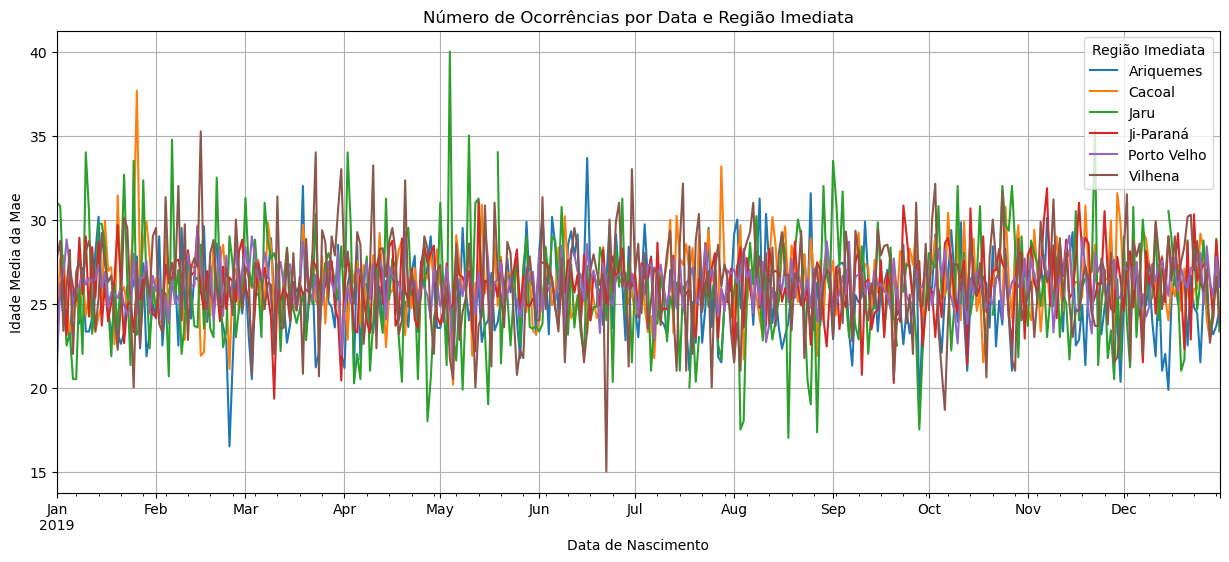

In [100]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['imediatas'] = imediatas

agrupado = sinasc_imediatas.groupby(['DTNASC','imediatas'])['IDADEMAE'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e Região Imediata')
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade Media da Mae')
plt.legend(title='Região Imediata')
plt.grid(True)
plt.show()

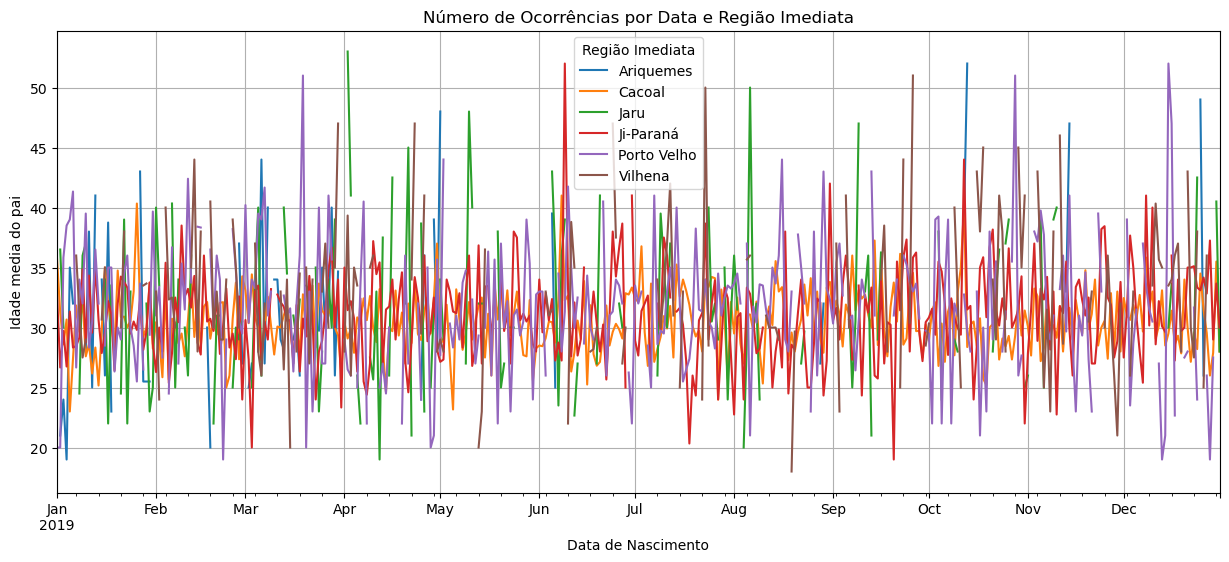

In [102]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['imediatas'] = imediatas

agrupado = sinasc_imediatas.groupby(['DTNASC','imediatas'])['IDADEPAI'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e Região Imediata')
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade media do pai')
plt.legend(title='Região Imediata')
plt.grid(True)
plt.show()

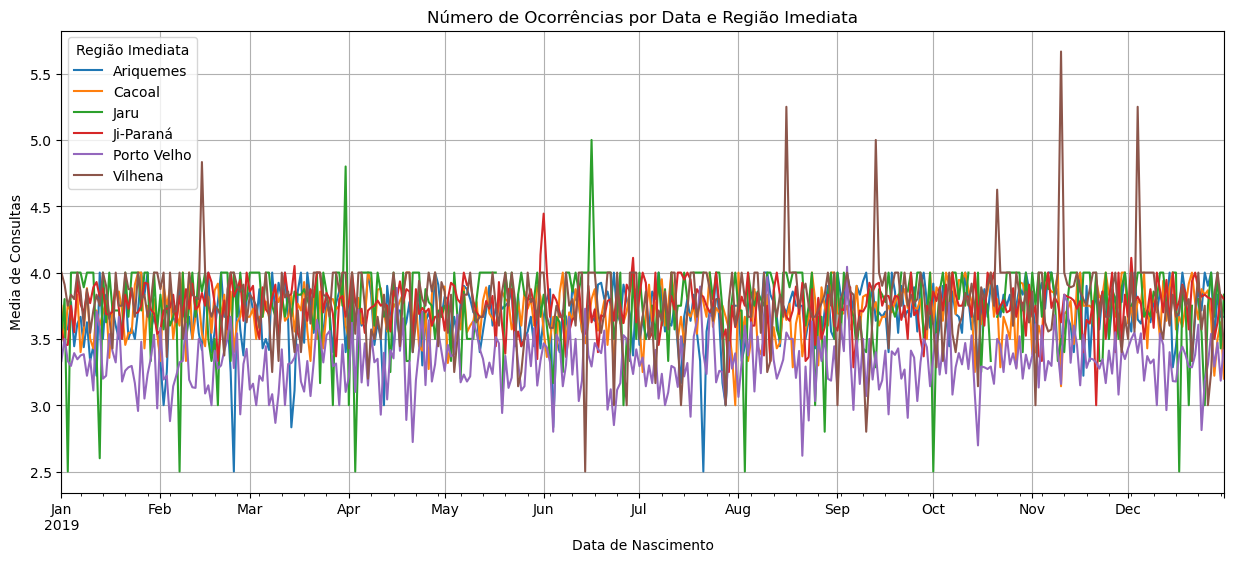

In [104]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['imediatas'] = imediatas

agrupado = sinasc_imediatas.groupby(['DTNASC','imediatas'])['CONSULTAS'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e Região Imediata')
plt.xlabel('Data de Nascimento')
plt.ylabel('Media de Consultas')
plt.legend(title='Região Imediata')
plt.grid(True)
plt.show()

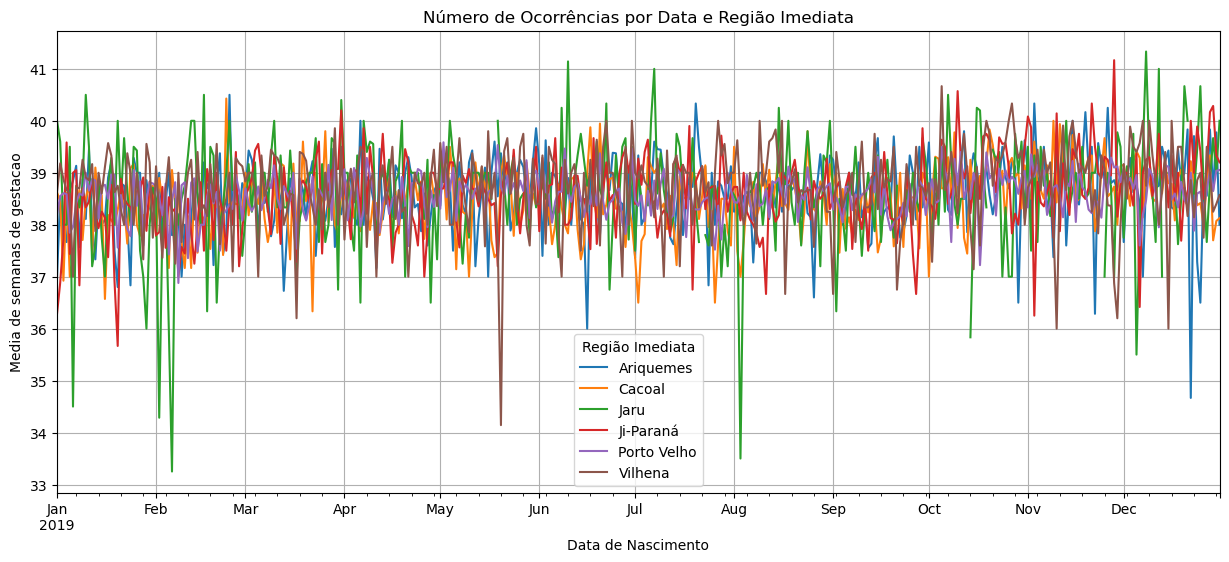

In [106]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['imediatas'] = imediatas

agrupado = sinasc_imediatas.groupby(['DTNASC','imediatas'])['SEMAGESTAC'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e Região Imediata')
plt.xlabel('Data de Nascimento')
plt.ylabel('Media de semanas de gestacao')
plt.legend(title='Região Imediata')
plt.grid(True)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [108]:
idh = {
    "Candeias do Jamari": "IDH Medio",
    "Guajará-Mirim": "IDH Medio",
    "Itapuã do Oeste": "IDH Medio",
    "Nova Mamoré": "IDH Baixo",
    "Porto Velho": "IDH Alto",
    "Ariquemes": "IDH Alto",
    "Alto Paraíso": "IDH Medio",
    "Buritis": "IDH Medio",
    "Cacaulândia": "IDH Medio",
    "Campo Novo de Rondônia": "IDH Baixo",
    "Cujubim": "IDH Medio",
    "Monte Negro": "IDH Medio",
    "Rio Crespo": "IDH Medio",
    "Jaru": "IDH Medio",
    "Governador Jorge Teixeira": "IDH Baixo",
    "Machadinho D'Oeste": "IDH Baixo",
    "Theobroma": "IDH Baixo",
    "Vale do Anari": "IDH Baixo",
    "Alvorada D'Oeste": "IDH Medio",
    "Costa Marques": "IDH Medio",
    "Ji-Paraná": "IDH Alto",
    "Mirante da Serra": "IDH Medio",
    "Nova União": "IDH Baixo",
    "Ouro Preto do Oeste": "IDH Medio",
    "Presidente Médici": "IDH Medio",
    "São Francisco do Guaporé": "IDH Medio",
    "São Miguel do Guaporé": "IDH Medio",
    "Seringueiras": "IDH Baixo",
    "Teixeirópolis": "IDH Medio",
    "Urupá": "IDH Medio",
    "Vale do Paraíso": "IDH Medio",
    "Cacoal": "IDH Alto",
    "Alta Floresta D'Oeste": "IDH Medio",
    "Alto Alegre dos Parecis": "IDH Baixo",
    "Castanheiras": "IDH Medio",
    "Espigão D'Oeste": "IDH Medio",
    "Ministro Andreazza": "IDH Medio",
    "Nova Brasilândia D'Oeste": "IDH Medio",
    "Novo Horizonte do Oeste": "IDH Medio",
    "Parecis": "IDH Medio",
    "Pimenta Bueno": "IDH Alto",
    "Primavera de Rondônia": "IDH Medio",
    "Rolim de Moura": "IDH Alto",
    "Santa Luzia D'Oeste": "IDH Medio",
    "São Felipe D'Oeste": "IDH Medio",
    "Vilhena": "IDH Alto",
    "Cabixi": "IDH Medio",
    "Cerejeiras": "IDH Medio",
    "Chupinguaia": "IDH Medio",
    "Colorado do Oeste": "IDH Medio",
    "Corumbiara": "IDH Medio",
    "Pimenteiras do Oeste": "IDH Medio"
}

In [110]:
sinasc_imediatas.groupby(idh).count()

IDADEMAE  IDADEPAI  DTNASC  CONSULTAS  SEMAGESTAC  imediatas
munResNome                                                              
IDH Alto       16855      4508   16855      16855       15906      16855
IDH Baixo       1826       447    1826       1826        1778       1826
IDH Medio       8346      2651    8346       8346        8105       8346

In [114]:
sinasc_imediatas.groupby(idh).agg({
    'SEMAGESTAC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

SEMAGESTAC                                                    \
                  sum       mean   min   max median       std       var   
munResNome                                                                
IDH Alto     613640.0  38.579153  19.0  45.0   39.0  2.026930  4.108447   
IDH Baixo     68560.0  38.560180  19.0  44.0   39.0  2.116482  4.479494   
IDH Medio    312416.0  38.546083  21.0  45.0   39.0  1.974012  3.896722   

           CONSULTAS                                               
                 sum      mean min max median       std       var  
munResNome                                                         
IDH Alto       59437  3.526372   1   9    4.0  0.839712  0.705116  
IDH Baixo       6649  3.641292   1   9    4.0  0.715406  0.511806  
IDH Medio      30576  3.663551   1   9    4.0  0.680575  0.463182

In [116]:
sinasc_imediatas.groupby(idh).agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

IDADEMAE                                                 IDADEPAI  \
                sum       mean min max median       std        var       sum   
munResNome                                                                     
IDH Alto     442955  26.280332  12  47   26.0  6.415374  41.157021  140082.0   
IDH Baixo     46247  25.326944  13  46   25.0  6.194908  38.376885   13686.0   
IDH Medio    216035  25.884855  11  53   25.0  6.353274  40.364092   82730.0   

                                                               
                 mean   min   max median       std        var  
munResNome                                                     
IDH Alto    31.074091  15.0  70.0   30.0  7.773149  60.421845  
IDH Baixo   30.617450  16.0  58.0   30.0  7.417345  55.017004  
IDH Medio   31.207092  16.0  86.0   30.0  7.824859  61.228418

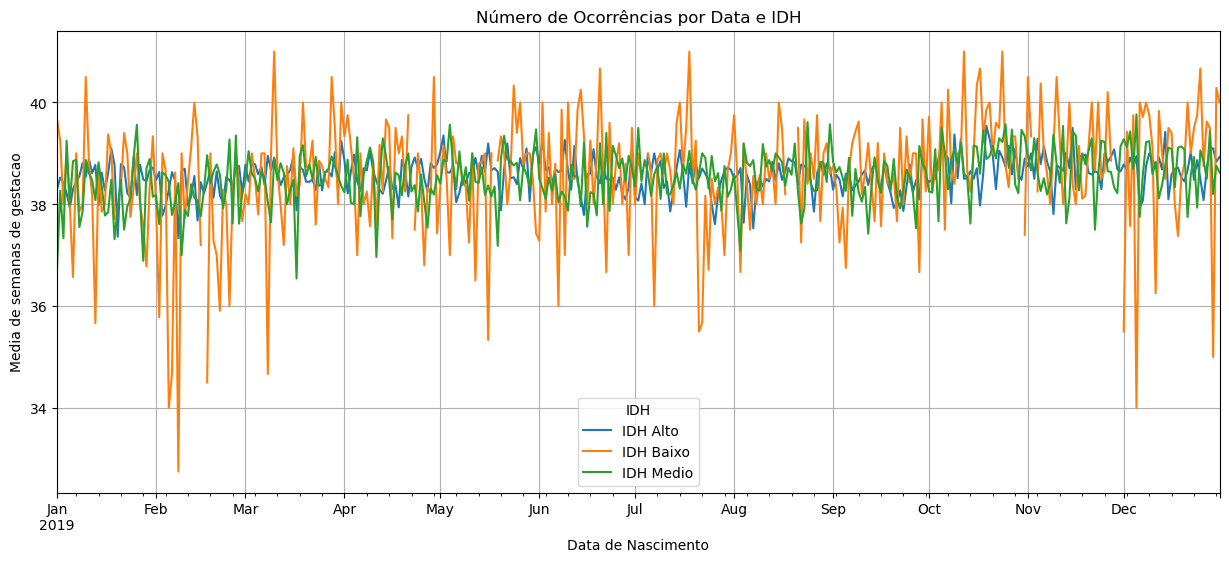

In [118]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['idh'] = idh

agrupado = sinasc_imediatas.groupby(['DTNASC','idh'])['SEMAGESTAC'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e IDH')
plt.xlabel('Data de Nascimento')
plt.ylabel('Media de semanas de gestacao')
plt.legend(title='IDH')
plt.grid(True)
plt.show()

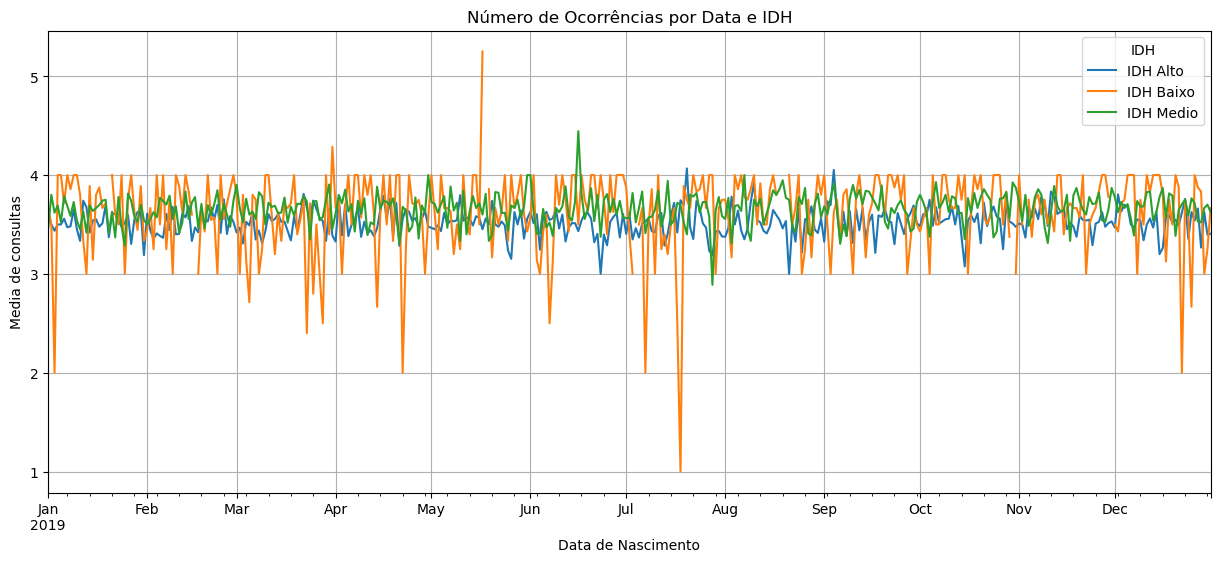

In [120]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['idh'] = idh

agrupado = sinasc_imediatas.groupby(['DTNASC','idh'])['CONSULTAS'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e IDH')
plt.xlabel('Data de Nascimento')
plt.ylabel('Media de consultas')
plt.legend(title='IDH')
plt.grid(True)
plt.show()

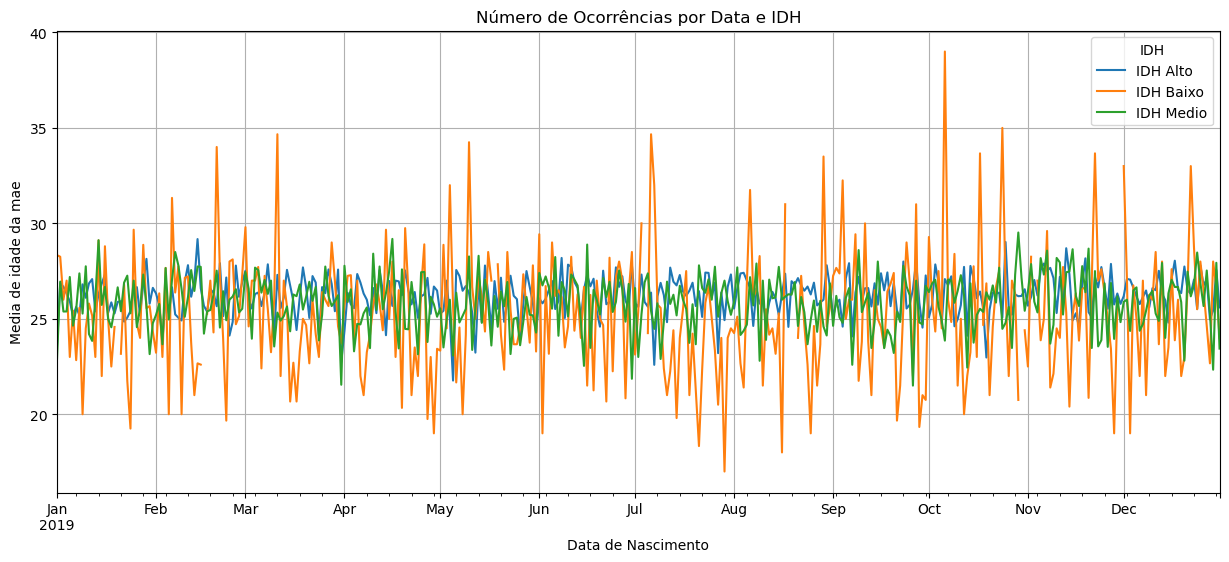

In [122]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['idh'] = idh

agrupado = sinasc_imediatas.groupby(['DTNASC','idh'])['IDADEMAE'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e IDH')
plt.xlabel('Data de Nascimento')
plt.ylabel('Media de idade da mae')
plt.legend(title='IDH')
plt.grid(True)
plt.show()

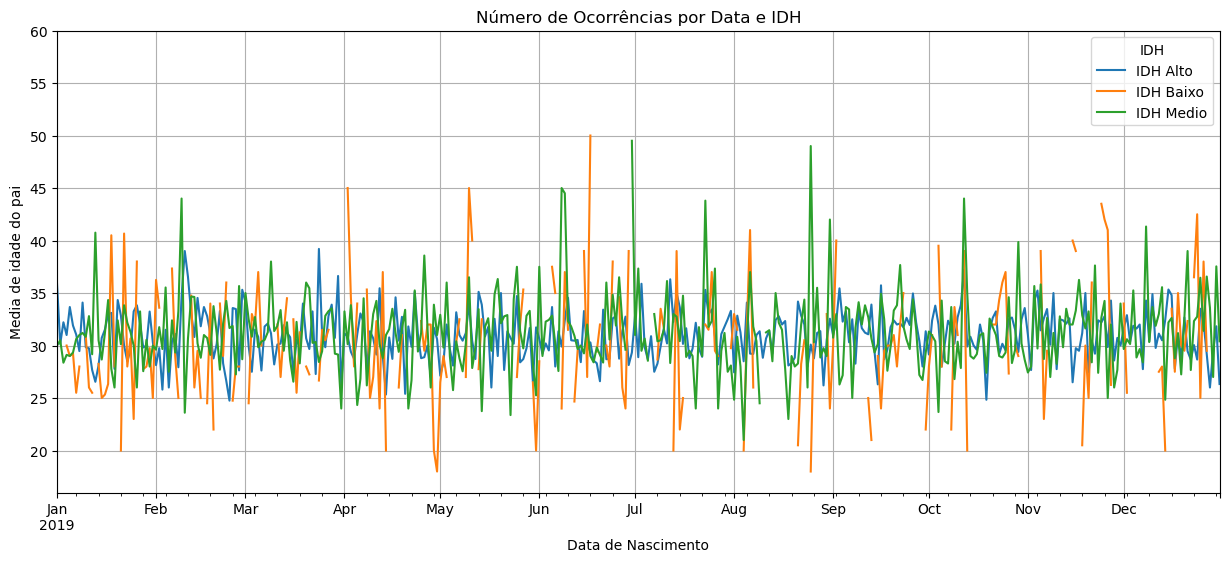

In [124]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['idh'] = idh

agrupado = sinasc_imediatas.groupby(['DTNASC','idh'])['IDADEPAI'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e IDH')
plt.xlabel('Data de Nascimento')
plt.ylabel('Media de idade do pai')
plt.legend(title='IDH')
plt.grid(True)
plt.show()

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [133]:
ifdm = {
    "Candeias do Jamari": "Moderado",
    "Guajará-Mirim": "Regular",
    "Itapuã do Oeste": "Regular",
    "Nova Mamoré": "Regular",
    "Porto Velho": "Moderado",
    "Ariquemes": "Moderado",
    "Alto Paraíso": "Regular",
    "Buritis": "Moderado",
    "Cacaulândia": "Regular",
    "Campo Novo de Rondônia": "Regular",
    "Cujubim": "Regular",
    "Monte Negro": "Moderado",
    "Rio Crespo": "Moderado",
    "Jaru": "Moderado",
    "Governador Jorge Teixeira": "Regular",
    "Machadinho D'Oeste": "Regular",
    "Theobroma": "Regular",
    "Vale do Anari": "Regular",
    "Alvorada D'Oeste": "Regular",
    "Costa Marques": "Regular",
    "Ji-Paraná": "Moderado",
    "Mirante da Serra": "Regular",
    "Nova União": "Regular",
    "Ouro Preto do Oeste": "Moderado",
    "Presidente Médici": "Moderado",
    "São Francisco do Guaporé": "Moderado",
    "São Miguel do Guaporé": "Moderado",
    "Seringueiras": "Regular",
    "Teixeirópolis": "Moderado",
    "Urupá": "Moderado",
    "Vale do Paraíso": "Regular",
    "Cacoal": "Moderado",
    "Alta Floresta D'Oeste": "Moderado",
    "Alto Alegre dos Parecis": "Regular",
    "Castanheiras": "Regular",
    "Espigão D'Oeste": "Regular",
    "Ministro Andreazza": "Regular",
    "Nova Brasilândia D'Oeste": "Regular",
    "Novo Horizonte do Oeste": "Regular",
    "Parecis": "Regular",
    "Pimenta Bueno": "Moderado",
    "Primavera de Rondônia": "Moderado",
    "Rolim de Moura": "Moderado",
    "Santa Luzia D'Oeste": "Moderado",
    "São Felipe D'Oeste": "Moderado",
    "Vilhena": "Moderado",
    "Cabixi": "Regular",
    "Cerejeiras": "Moderado",
    "Chupinguaia": "Moderado",
    "Colorado do Oeste": "Moderado",
    "Corumbiara": "Regular",
    "Pimenteiras do Oeste": "Moderado"
}

In [135]:
sinasc_imediatas.groupby(ifdm).count()

IDADEMAE  IDADEPAI  DTNASC  CONSULTAS  SEMAGESTAC  imediatas  \
munResNome                                                                 
Moderado       21946      6225   21946      21946       20904      21946   
Regular         5081      1381    5081       5081        4885       5081   

              idh  
munResNome         
Moderado    21946  
Regular      5081

In [137]:
sinasc_imediatas.groupby(ifdm).agg({
    'SEMAGESTAC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

SEMAGESTAC                                                    \
                  sum       mean   min   max median       std       var   
munResNome                                                                
Moderado     806354.0  38.574148  19.0  45.0   39.0  1.997021  3.988091   
Regular      188262.0  38.538792  19.0  45.0   39.0  2.099193  4.406613   

           CONSULTAS                                               
                 sum      mean min max median       std       var  
munResNome                                                         
Moderado       78453  3.574820   1   9    4.0  0.799853  0.639765  
Regular        18209  3.583743   1   9    4.0  0.736642  0.542641

In [139]:
sinasc_imediatas.groupby(ifdm).agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

IDADEMAE                                                 IDADEPAI  \
                sum       mean min max median       std        var       sum   
munResNome                                                                     
Moderado     575493  26.223139  12  53   26.0  6.385869  40.779325  193359.0   
Regular      129744  25.535131  11  52   25.0  6.363435  40.493303   43139.0   

                                                               
                 mean   min   max median       std        var  
munResNome                                                     
Moderado    31.061687  15.0  70.0   30.0  7.714357  59.511297  
Regular     31.237509  16.0  86.0   30.0  8.022527  64.360940

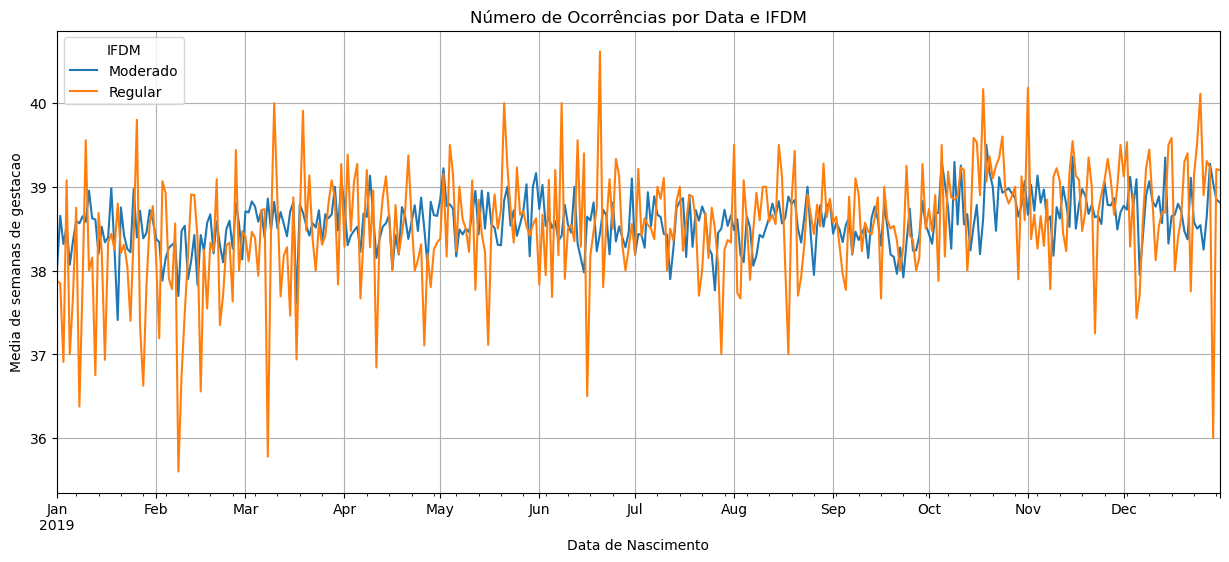

In [143]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['ifdm'] = ifdm

agrupado = sinasc_imediatas.groupby(['DTNASC','ifdm'])['SEMAGESTAC'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e IFDM')
plt.xlabel('Data de Nascimento')
plt.ylabel('Media de semanas de gestacao')
plt.legend(title='IFDM')
plt.grid(True)
plt.show()

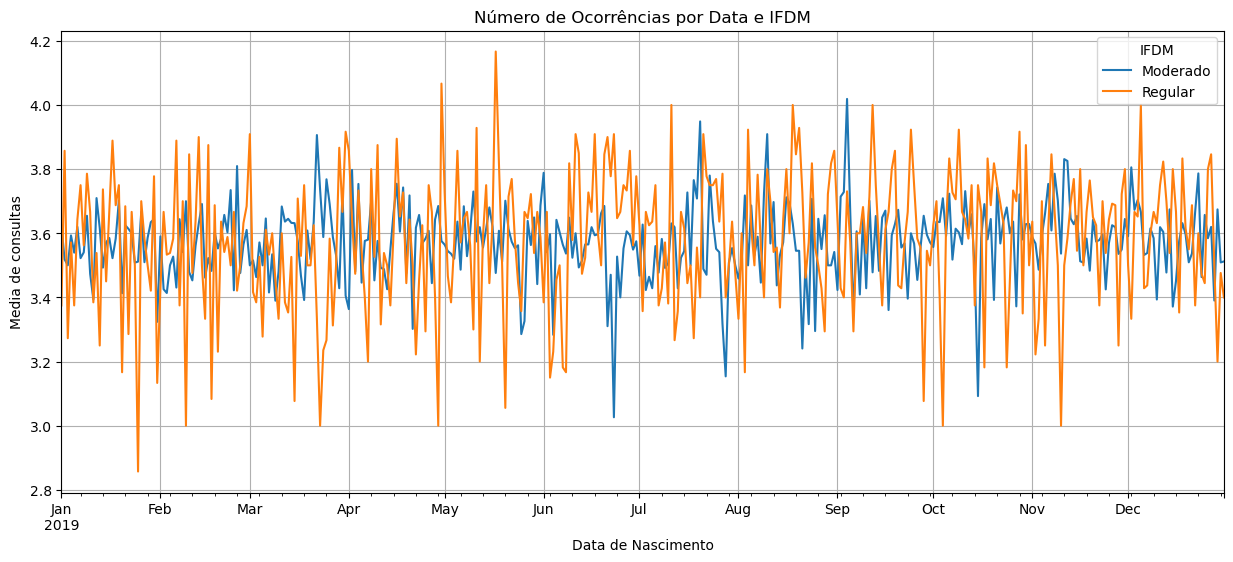

In [145]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['ifdm'] = ifdm

agrupado = sinasc_imediatas.groupby(['DTNASC','ifdm'])['CONSULTAS'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e IFDM')
plt.xlabel('Data de Nascimento')
plt.ylabel('Media de consultas')
plt.legend(title='IFDM')
plt.grid(True)
plt.show()

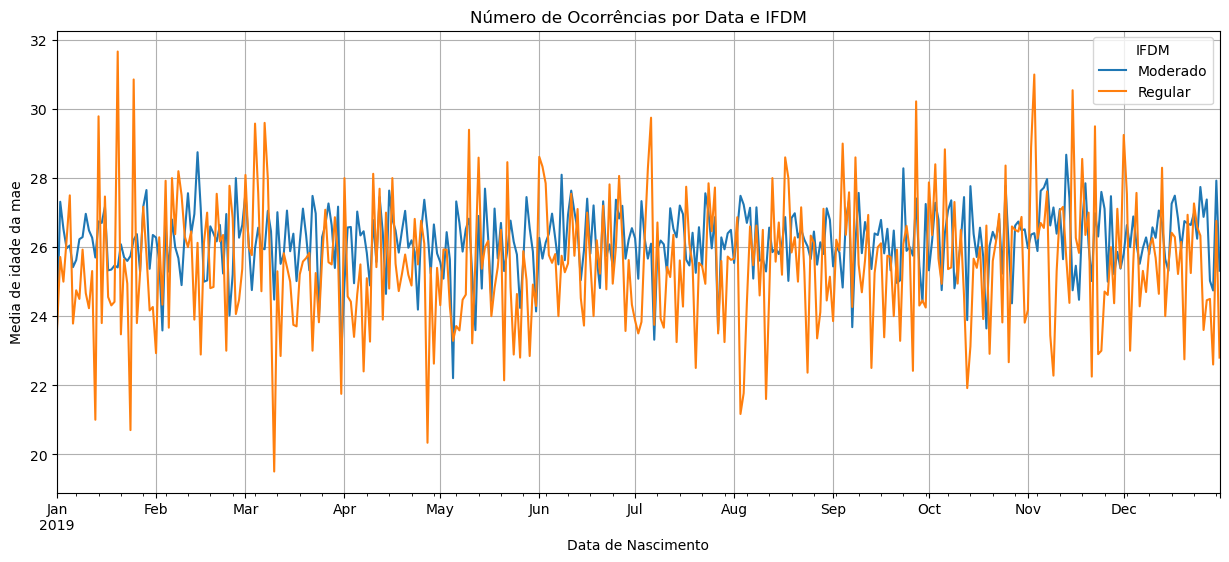

In [147]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['ifdm'] = ifdm

agrupado = sinasc_imediatas.groupby(['DTNASC','ifdm'])['IDADEMAE'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e IFDM')
plt.xlabel('Data de Nascimento')
plt.ylabel('Media de idade da mae')
plt.legend(title='IFDM')
plt.grid(True)
plt.show()

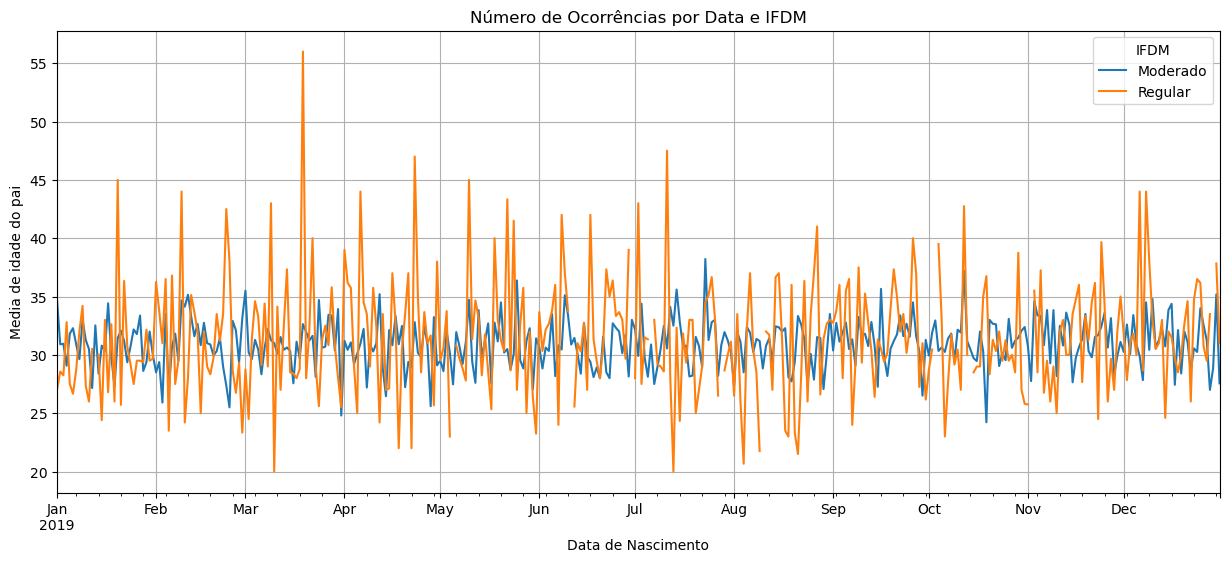

In [149]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['ifdm'] = ifdm

agrupado = sinasc_imediatas.groupby(['DTNASC','ifdm'])['IDADEPAI'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e IFDM')
plt.xlabel('Data de Nascimento')
plt.ylabel('Media de idade do pai')
plt.legend(title='IFDM')
plt.grid(True)
plt.show()

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [151]:
pib = {
    "Candeias do Jamari": "Acima de 500 milhoes",
    "Guajará-Mirim": "Acima de 500 milhoes",
    "Itapuã do Oeste": "Acima de 100 milhoes",
    "Nova Mamoré": "Acima de 500 milhoes",
    "Porto Velho": "Acima de 1 bilhao",
    "Ariquemes": "Acima de 1 bilhao",
    "Alto Paraíso": "Acima de 300 milhoes",
    "Buritis": "Acima de 500 milhoes",
    "Cacaulândia": "Acima de 100 milhoes",
    "Campo Novo de Rondônia": "Acima de 200 milhoes",
    "Cujubim": "Acima de 300 milhoes",
    "Monte Negro": "Acima de 200 milhoes",
    "Rio Crespo": "Ate de 100 milhoes",
    "Jaru": "Acima de 1 bilhao",
    "Governador Jorge Teixeira": "Acima de 100 milhoes",
    "Machadinho D'Oeste": "Acima de 500 milhoes",
    "Theobroma": "Acima de 100 milhoes",
    "Vale do Anari": "Acima de 100 milhoes",
    "Alvorada D'Oeste": "Acima de 200 milhoes",
    "Costa Marques": "Acima de 100 milhoes",
    "Ji-Paraná": "Acima de 1 bilhao",
    "Mirante da Serra": "Acima de 100 milhoes",
    "Nova União": "Ate de 100 milhoes",
    "Ouro Preto do Oeste": "Acima de 500 milhoes",
    "Presidente Médici": "Acima de 300 milhoes",
    "São Francisco do Guaporé": "Acima de 300 milhoes",
    "São Miguel do Guaporé": "Acima de 500 milhoes",
    "Seringueiras": "Acima de 100 milhoes",
    "Teixeirópolis": "Ate de 100 milhoes",
    "Urupá": "Acima de 100 milhoes",
    "Vale do Paraíso": "Acima de 100 milhoes",
    "Cacoal": "Acima de 1 bilhao",
    "Alta Floresta D'Oeste": "Acima de 300 milhoes",
    "Alto Alegre dos Parecis": "Acima de 200 milhoes",
    "Castanheiras": "Ate de 100 milhoes",
    "Espigão D'Oeste": "Acima de 500 milhoes",
    "Ministro Andreazza": "Acima de 100 milhoes",
    "Nova Brasilândia D'Oeste": "Acima de 300 milhoes",
    "Novo Horizonte do Oeste": "Acima de 100 milhoes",
    "Parecis": "Ate de 100 milhoes",
    "Pimenta Bueno": "Acima de 1 bilhao",
    "Primavera de Rondônia": "Ate de 100 milhoes",
    "Rolim de Moura": "Acima de 1 bilhao",
    "Santa Luzia D'Oeste": "Acima de 100 milhoes",
    "São Felipe D'Oeste": "Ate de 100 milhoes",
    "Vilhena": "Acima de 1 bilhao",
    "Cabixi": "Acima de 100 milhoes",
    "Cerejeiras": "Acima de 500 milhoes",
    "Chupinguaia": "Acima de 100 milhoes",
    "Colorado do Oeste": "Acima de 300 milhoes",
    "Corumbiara": "Acima de 100 milhoes",
    "Pimenteiras do Oeste": "Ate de 100 milhoes"
}

In [153]:
sinasc_imediatas.groupby(pib).count()

IDADEMAE  IDADEPAI  DTNASC  CONSULTAS  SEMAGESTAC  \
munResNome                                                                
Acima de 1 bilhao        17736      4650   17736      17736       16778   
Acima de 100 milhoes      1952       666    1952       1952        1898   
Acima de 200 milhoes       724       295     724        724         712   
Acima de 300 milhoes      1880       638    1880       1880        1857   
Acima de 500 milhoes      4304      1087    4304       4304        4121   
Ate de 100 milhoes         431       270     431        431         423   

                      imediatas    idh   ifdm  
munResNome                                     
Acima de 1 bilhao         17736  17736  17736  
Acima de 100 milhoes       1952   1952   1952  
Acima de 200 milhoes        724    724    724  
Acima de 300 milhoes       1880   1880   1880  
Acima de 500 milhoes       4304   4304   4304  
Ate de 100 milhoes          431    431    431

In [155]:
sinasc_imediatas.groupby(pib).agg({
    'SEMAGESTAC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

SEMAGESTAC                                          \
                            sum       mean   min   max median       std   
munResNome                                                                
Acima de 1 bilhao      647314.0  38.581118  19.0  45.0   39.0  2.010050   
Acima de 100 milhoes    73243.0  38.589568  19.0  45.0   39.0  1.980037   
Acima de 200 milhoes    27453.0  38.557584  28.0  44.0   39.0  1.709426   
Acima de 300 milhoes    71583.0  38.547658  24.0  45.0   39.0  1.978335   
Acima de 500 milhoes   158835.0  38.542829  22.0  45.0   39.0  2.117351   
Ate de 100 milhoes      16188.0  38.269504  21.0  43.0   38.0  2.071744   

                               CONSULTAS                                     \
                           var       sum      mean min max median       std   
munResNome                                                                    
Acima de 1 bilhao     4.040299     62805  3.541103   1   9    4.0  0.829606   
Acima de 100 milhoes  3.920545      7318  3.748975   1   9    4.0  0.592538   
Acima de 200 milhoes  2.922136      2658  3.671271   1   4    4.0  0.637425   
Acima de 300 milhoes  3.913811      6999  3.722872   1   9    4.0  0.610628   
Acima de 500 milhoes  4.483177     15279  3.549954   1   9    4.0  0.779600   
Ate de 100 milhoes    4.292125      1603  3.719258   1   4    4.0  0.604307   

                                
                           var  
munResNome                      
Acima de 1 bilhao     0.688246  
Acima de 100 milhoes  0.351101  
Acima de 200 milhoes  0.406310  
Acima de 300 milhoes  0.372867  
Acima de 500 milhoes  0.607776  
Ate de 100 milhoes    0.365186

In [157]:
sinasc_imediatas.groupby(pib).agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

IDADEMAE                                                 \
                          sum       mean min max median       std        var   
munResNome                                                                     
Acima de 1 bilhao      465846  26.265562  12  47   26.0  6.403777  41.008357   
Acima de 100 milhoes    50094  25.662910  12  52   25.0  6.306384  39.770474   
Acima de 200 milhoes    18334  25.323204  13  44   25.0  6.064473  36.777829   
Acima de 300 milhoes    48567  25.833511  11  53   25.0  6.273901  39.361835   
Acima de 500 milhoes   110968  25.782528  13  53   25.0  6.469479  41.854159   
Ate de 100 milhoes      11428  26.515081  14  41   26.0  5.925831  35.115470   

                      IDADEPAI                                          \
                           sum       mean   min   max median       std   
munResNome                                                               
Acima de 1 bilhao     144654.0  31.108387  15.0  70.0   30.0  7.767477   
Acima de 100 milhoes   21047.0  31.602102  17.0  73.0   30.0  7.954339   
Acima de 200 milhoes    8964.0  30.386441  16.0  55.0   30.0  7.739365   
Acima de 300 milhoes   19257.0  30.183386  16.0  64.0   29.0  7.415833   
Acima de 500 milhoes   34048.0  31.322907  16.0  86.0   31.0  7.863105   
Ate de 100 milhoes      8528.0  31.585185  17.0  67.0   30.0  7.694333   

                                 
                            var  
munResNome                       
Acima de 1 bilhao     60.333700  
Acima de 100 milhoes  63.271514  
Acima de 200 milhoes  59.897775  
Acima de 300 milhoes  54.994574  
Acima de 500 milhoes  61.828416  
Ate de 100 milhoes    59.202754

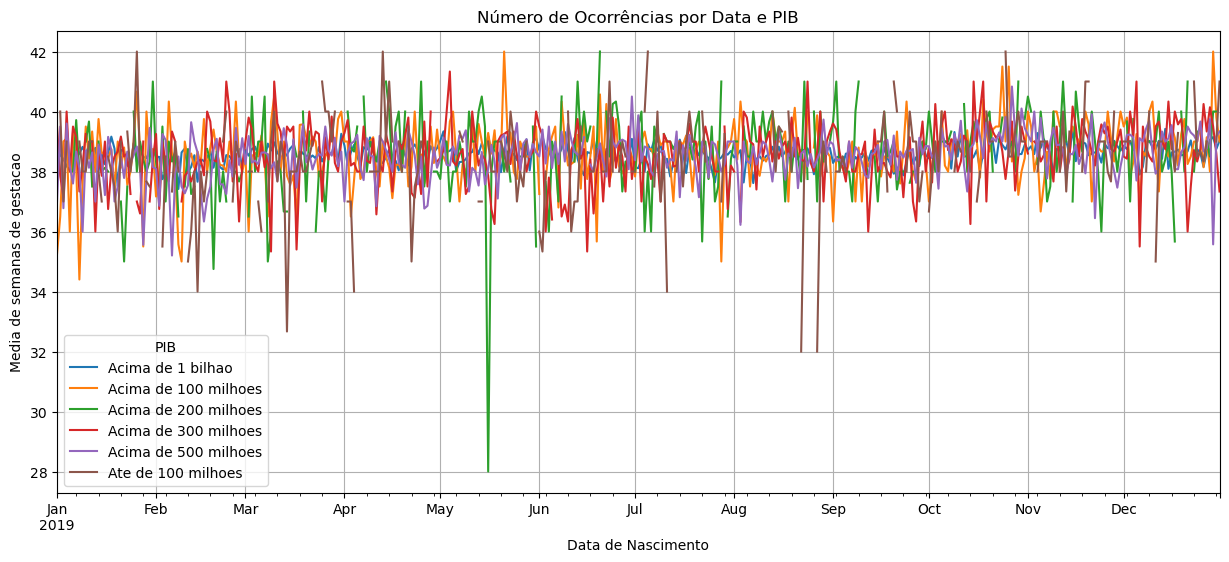

In [159]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['pib'] = pib

agrupado = sinasc_imediatas.groupby(['DTNASC','pib'])['SEMAGESTAC'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e PIB')
plt.xlabel('Data de Nascimento')
plt.ylabel('Media de semanas de gestacao')
plt.legend(title='PIB')
plt.grid(True)
plt.show()

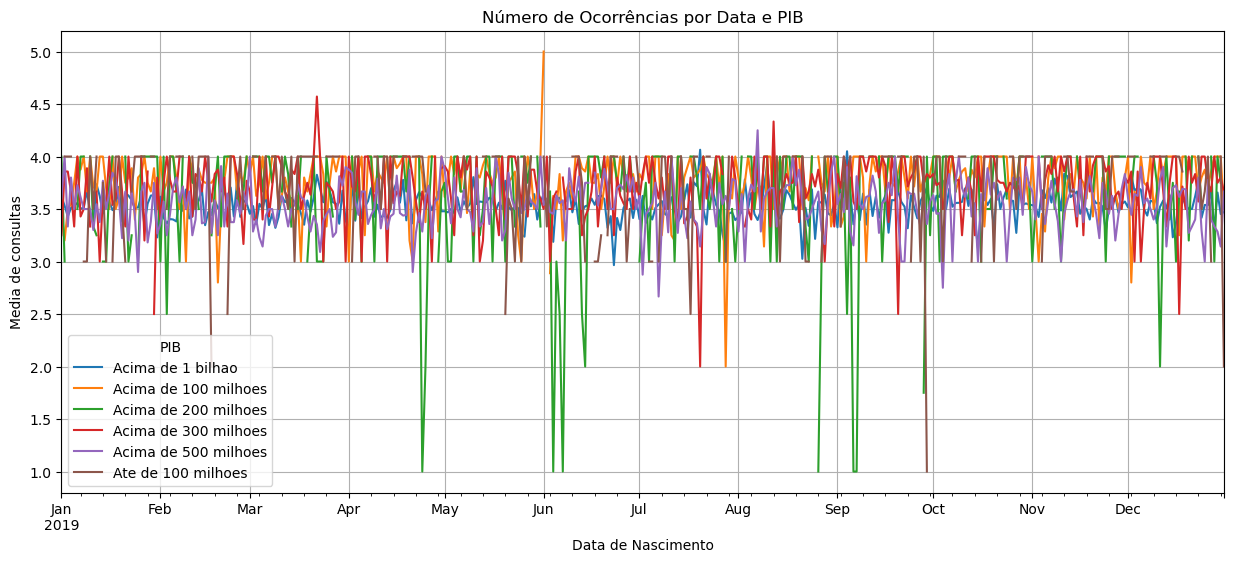

In [161]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['pib'] = pib

agrupado = sinasc_imediatas.groupby(['DTNASC','pib'])['CONSULTAS'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e PIB')
plt.xlabel('Data de Nascimento')
plt.ylabel('Media de consultas')
plt.legend(title='PIB')
plt.grid(True)
plt.show()

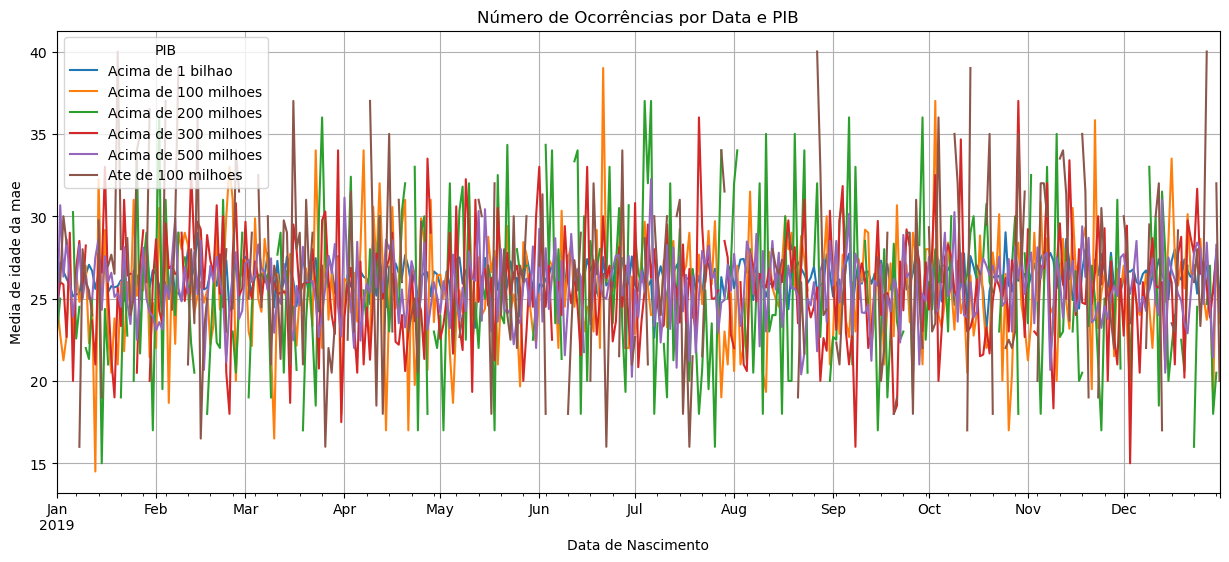

In [163]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['pib'] = pib

agrupado = sinasc_imediatas.groupby(['DTNASC','pib'])['IDADEMAE'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e PIB')
plt.xlabel('Data de Nascimento')
plt.ylabel('Media de idade da mae')
plt.legend(title='PIB')
plt.grid(True)
plt.show()

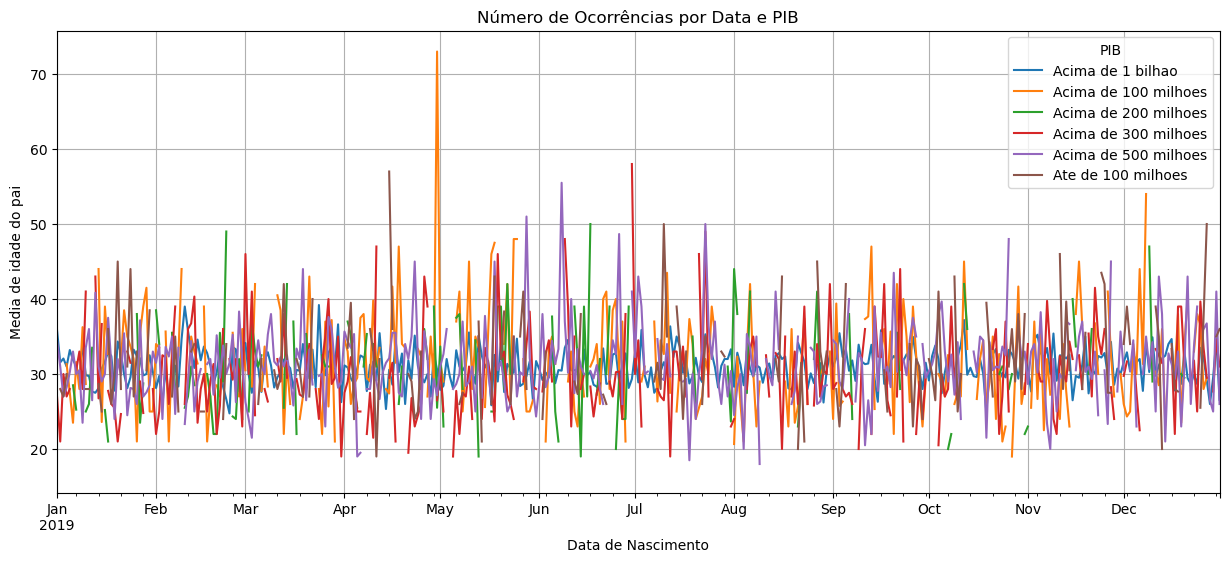

In [165]:
sinasc_imediatas['DTNASC'] = pd.to_datetime(sinasc_imediatas['DTNASC'])
sinasc_imediatas['pib'] = pib

agrupado = sinasc_imediatas.groupby(['DTNASC','pib'])['IDADEPAI'].mean().unstack()
agrupado.plot(figsize=[15,6])
plt.title('Número de Ocorrências por Data e PIB')
plt.xlabel('Data de Nascimento')
plt.ylabel('Media de idade do pai')
plt.legend(title='PIB')
plt.grid(True)
plt.show()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Primeiramente separamos os dados nas categorias segundo as latitudes em acima e abaixo de -10.5 graus e analisamos as Semanas de Gestacao (SEMAGESTAC) juntamente com o numero de consultas (CONSULTAS). Dessa forma conseguimos observar que, para o caso das semanas de gestacao, considerando que a media, o desvio padrao e a variancia de ambos os casos sao parecidos, nao pode ser observado alguma influencia do parametro latitude para esta variavel. Por outro lado, considerando para o numero de consultas, a media abaixo da latitude observada eh um pouco maior, porem considerando o desvio padrao e a variancia, notamos que os dados estao mais concentrados em torno da media para as cidades abaixo da latitude de -10.5.

Considerando agora a separacao em categorias de municipio abaixo e acima dos 3000 km quadrados, analisando as semanas de gestacao e o numero de consultas pode-se observar que as medias permanecem aproximadamente as mesmas para ambas as variaveis. Porem ao observarmos os desvios padrao e as variancias, notamos que os dados se encontram mais concentrados em torno da media nos municipios abaixo de 3000 km quadrados, visto que estes parametros sao numericamente menores para anbas as variaveis.

Agora vamos analisar as variaveis de semana de gestacao e consultas para os municipios abaixo de 100 metros de altitude, entre 100 e 200 metros de altitude e acima dos 200 metros. Todos os municipios apresentam a mesma media de semanas de gestacao, incluindo tambem o mesmo valor numerico aproximado para o desvio padrao, porem a variancia modifica um pouco para os municipios acima de 200 metros. Quanto as consultas, a media se difere para os municipios abaixo dos 100 metros, porem com dados mais espalhados, visto que o desvio padrao e a variancia sao maiores do que as faixas acima desta altitude.

Observando agora as variaveis da media da idade da mae e do pai, bem como o numero de consulta e semanas de gestacao ao longo do ano de 2019, podemos observar que a regiao imediata de Jaru apresenta as idades medias da mae mais variadas ao apresentar mais dados discrepantes do intervalo medio das outras regioes. Importante tambem observar que a idade da mae se localiza em torno de 25 anos de idade.
Quanto a idade media do pai, podemos observar que os valores se localizam em torno de pouco mais de 30 anos e variam bastante em todas as regioes imediatas.
Obervando agora o numero de consultas, notamos que ha uma tendencia de no maximo 4 consultas, podendo ser observados dados discrepantes para as regioes de Vilhena e Jaru, onde em alguns dias do ano ha um pico acima das 4 consultas. Por outro lado a regiao de Jaru apresenta mais dados menores do que as 3.5 consultas em relacao as outras regioes imediatas, seguida da regiao de Porto Velho.
Finalmente podemos observar que o numero de semanas de gestacao se concentra entre as 38 e 39 semanas, porem podendo ser observados dados discrepantes abaixo desta faixa em especial para a regiao imediata de Jaru.


Observando agora os dados no tempo separando em IDH Alto, Medio e Baixo, vamos observar as medias de consultas, semanas de gestacao e as idades meduas do pai e da mae. Perceba que para a media de consultas, para todas as faixas ha uma concentracao em torno do valor acima de 3.5, com um maximo de 4 consultas. Porem notamos que a faixa de municipios com IDH baixo apresentam mais dados com consultas abaixo da faixa onde se concentram as consultas medias.
Ao comparmos agora o numero de semanas de gestacao percebemos que elas se concentram em torno das 38 semanas, porem nos municipios de IDH baixo observamos uma maior variacao na quantidade de semanas de gestacao.
Quanto a idade media da mae a tendencia da idade media de pouco acima dos 25 anos se mantem, porem a variacao desta media tende a ser mais observadas nos municipios de IDH baixo.
Quanto a media da idade do pai, pode-se observar que ela gira em torno dos 30 anos, porem observamos uma maior variacao nesta media para os municipios de IDH baixo e medio.

Utilizando agora o indicador IFDM em duas faixas, sendo moderado e regular, comparando o numero de semanas de gestacao, notamos que municipios com IFDM moderado se concentram mais em torno da faixa entre 38 e 39 semanas, enquanto que aqueles com IFDM regular variam mais a quantidade de semanas.
Para a media de consultas, ambos indicadores apresentam relativa variacao, porem com destaque para aqueles com IFDM regular.
Quanto a idade da mae, municipios com IFDM moderado apresentam a idade na faixa entre os 24 e 28 anos, enquanto que para o IFDM regular, a variacao da media de idade da mae apresenta uma amplitude maior.
Por fim, para a media de idade do pai, nos municipios com IFDM mpderado observamos que ela se concentra entre os 25 e 35 anos, enquanto que para o IFDM regular ha uma variacao maior na media de idade na faixa entre os 20 e 45 anos.


Finalmente vamos observar o efeito do PIB nas variaveis numero de semanas de gestacao, consultas, e idade media do pai e da mae.
Primeiramente obervando as semanas de gestacao, vemos uma variacao maior nos municipios cujo PIB esta em ate 100 milhoes de reais.
Analisando agora a media de consultas notamos dados discrepantes onde vemos uma menor quantidade de consultas para os municipios acima de 200 milhoes.
Quanto a idade media da mae, notamos que nos municipios com pib acima de 1 bilhao e de 500 milhoes, ha uma concentracao maior em torno da media, enquanto que nas faixas de menor PIB ha uma variacao maior nesta media, o que tambem pode ser observado para a media da idade do pai.

Em conclusao, observando segundo os indicadores propostos, podemos notar que os municipios de maior desenvolvimento economico e social apresentam as idades medias dos pais mais concentradas em alguma faixa de idade, o que pode indicar um maior planejamento familiar devido ao maior acesso a bens de consumo e educacao (o que precisa ser observado em futuras analises). Tambem notamos que estes mesmos indicadores influenciam no tempo de gestacao da mae, fazendo com que ela tenha uma gravidez mais segura